1-1. 시각화 포함 탐색적 자료분석을 시행하시오.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/diabetes_for_test.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


데이터셋은 모두 수치형 변수로 이루어져 있음

In [5]:
outcome_type = df.Outcome.value_counts()

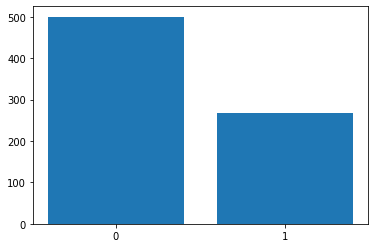

In [9]:
import matplotlib.pyplot as plt
plt.bar(outcome_type.index, outcome_type.values, width=0.8, bottom=None, align='center')
plt.xticks(outcome_type.index)
plt.show()

종속변수인 Ountcome변수는 0과 1로 구성되어 있으며, 분포가 고르지 못함 -> 분류분석을 시행해야함

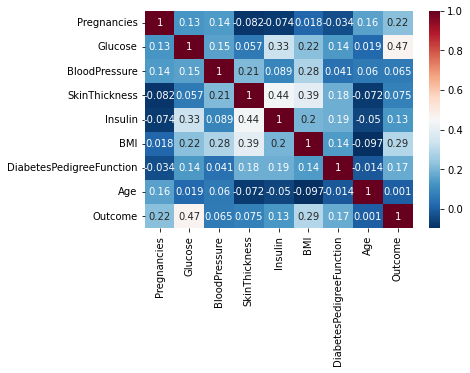

In [12]:
import seaborn as sns
df_corr = df.corr(method='pearson')
sns.heatmap(df_corr,
            xticklabels = df_corr.columns,
            cmap='RdBu_r',
            annot=True)
plt.show()

종속변수와 상관관계가 존재하는 변수는 존재하지 않음

나머지 변수들끼리의 상관관계도 거의 존재하지 않음

In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

결측치는 존재하지 않음

1-2. 이상치를 식별하고 처리하시오.

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


age의 최댓값이 999이므로 전처리 과정이 필요해 보임

또한, Insuline도 중앙값 30.5에 비해 최댓값이 846이므로 전처리 여부 결정해야함

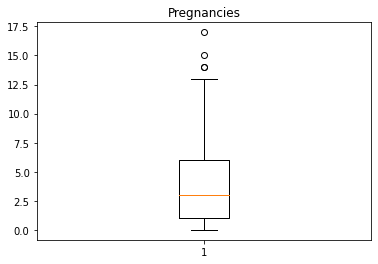

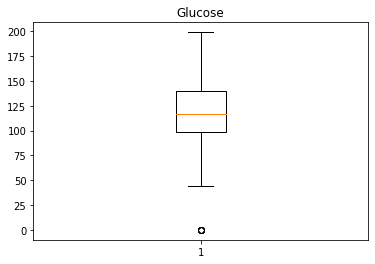

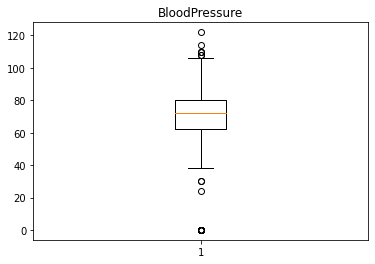

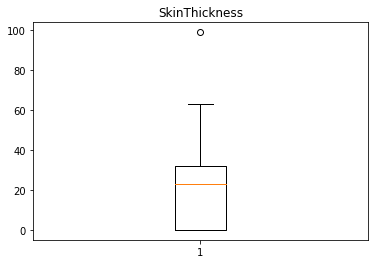

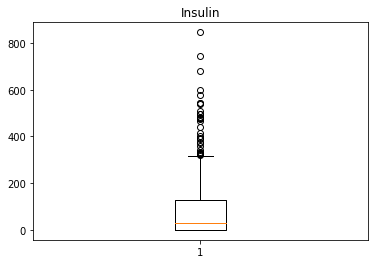

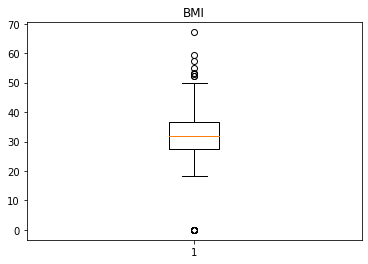

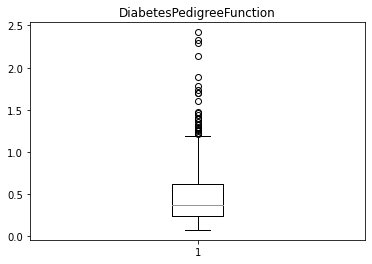

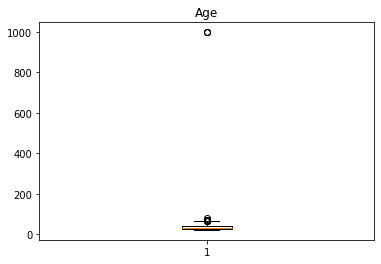

In [22]:
columns = df.drop(columns='Outcome').columns

for col in columns:
    plt.boxplot(df[col], whis=1.5)
    plt.title(col)
    plt.show()

Insuline과 DiabetesPedigreeFunction 컬럼에서 이상치가 눈에 띄게 많은 것을 확인했지만, 이상치들이 연속적으로 이어져 있기 때문에 실제로 이상치를 가진 사람일 수 있으므로 현업의 의견이 필요할 것으로 판단되어 Age의 이상치만을 처리

c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

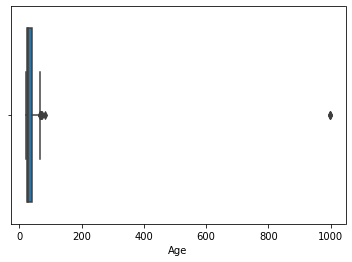

In [24]:
sns.boxplot(df['Age'])

Age의 중앙값 :  29.0


c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

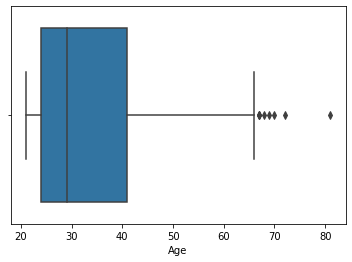

In [25]:
print('Age의 중앙값 : ', df['Age'].median())
outlier_index = df[df['Age']>400].index
df.loc[outlier_index,'Age'] = df.Age.median()
sns.boxplot(df['Age'])

400살 이상인 사람의 데이터를 Age컬럼의 중앙값인 median으로 대체하였다.

또한, Glucose와 BloodPressure컬럼에는 0이 존재하지 않아야 한다고 판단하여 이를 중앙값으로 대체하였다.

In [26]:
outlier_index = df[df['Glucose'] == 0].index
df.loc[outlier_index,'Glucose'] = df.Glucose.median()

outlier_index = df[df['BloodPressure'] == 0].index
df.loc[outlier_index, 'BloodPressure'] = df.BloodPressure.median()

In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,31.992578,0.471876,33.191406,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,7.884160,0.331329,11.683509,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1-3. 앞선 두 단계에서 발견한 향후 분석 시에 고려해야할 사항을 작성하시오.

현업의 의견을 구해 Insuline과 DiabetesPedigreeFunction 컬럼의 이상치를 처리하고, 최솟값과 최댓값의 차이가 많이 나는 컬럼이 존재한다. 따라서 모델 사용시 scale을 적용할 필요가 있어보인다.

2-1. 업샘플링 과정을 설명하고 결과를 작성하시오.

업샘플링은 소수의 레이블을 지닌 데이터셋을 다수 레이블을 지닌 데이터셋의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이다. 데이터의 손실이 없기 때문에 일반적으로 언더샘플링보다 성능이 유리하다.

- 랜덤 오버 샘플링 : 소수의 레이블을 지닌 데이터셋을 단순 복제하여 다수의 레이블과 비율을 맞추는 방법이다. 데이터를 단순 복제하기 때문에 분포는 변하지 않지만 그 수가 늘어나 같은 비율로 가중치를 받을 수 있다. 오버피팅의 위험성이 있지만, 불균형 문제를 처리하지 않는 것 보다는 유효하다.

- SMOTE : 소수 레이블을 지닌 데이터셋의 관측 값에 대한 K개의 최근접 이웃을 찾고, 관측 값과 이웃으로 선택된 값 사이에 임의의 데이터를 생성하는 방법으로 샘플의 수를 늘리는 방법이다.

따라서 SMOTE 방법을 사용해서 업샘플링을 진행한다.

In [35]:
from collections import Counter
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']
Counter(y)

Counter({1: 268, 0: 500})

In [36]:
from imblearn.over_sampling import SMOTE

smote_sample = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote_sample.fit_resample(X,y)
print(Counter(y_sm))

Counter({1: 500, 0: 500})


y = 0인 데이터에 맞추워 1:1로 데이터의 수가 늘어난 것을 확인함

2-2. 언더샘플링 과정을 설명하고 결과를 작성하시오.

언더 샘플링은 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터셋이 가진 레이블의 수 수준으로 감소시키는 기법이다. 

- 랜덤언더샘플링 : 다수를 차지하는 레이블에서 무작위로 데이터를 제거하는 방법이다. 

In [37]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X,y)

print(Counter(y_under))

Counter({0: 268, 1: 268})


적은수의 레이블인 0에 맞춰 각각 268개로 언더 샘플링 된것을 확인함

2-3. 둘 중 하나를 선택하고 선택한 이유를 서술하시오.

업샘플링 기법을 선택한다. 언더 샘플링 기법을 사용하면 데이터 불균형으로 인한 문제는 피할 수 있지만, 데이터의 수가 급격하게 줄어들어 오히려 학습 성능을 떨어뜨리는 결과를 초래할 수 있다. 따라서 데이터의 수가 적은 당뇨병 데이터셋에는 데이터 손실의 위험이 없는 오버샘플링 기법을 사용하여 분석을 진행한다.

3-1. 최소 3개 이상의 모델링 알고리즘을 제시하고, 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오.

속도 측면에서 Logistic Regression, 정확도 측면에서 SVM, 기타로 XGBoost를 제시한다.

In [50]:
X = df.drop(['Outcome'], axis=1)
y = df[['Outcome']]

In [51]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

log = LogisticRegression()
xgb = XGBClassifier(random_state=0)
svm_clf = SVC(kernel='linear')

3-2. 모델을 비교하고 결과를 설명하시오.

In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# 5개의 경우의 수로 분할하여 검증
kfold = KFold()
def model_result(model):
    pred_li = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index,:], y.iloc[test_index,:]
        
        X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
        
        start = time.time()
        model.fit(X_train_resample, y_train_resample)
        end = time.time()
        
        pred = model.predict(X_test)
        pred_li.append(accuracy_score(pred, y_test['Outcome']))
        
    print(f"{end - start:.5f} sec")
    print(np.mean(pred_li))

In [57]:
# Logistic Regression

model_result(log)

0.01045 sec
0.7487904252610134


c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed w

In [58]:
model_result(xgb)

0.08254 sec
0.7474492827434004


In [59]:
model_result(svm_clf)

c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

2.29687 sec
0.7605126899244546


데이터의 수가 적기 때문에 Hold-out기법이 아니라 cross-validation 기법을 사용해 성능을 확인하였고, Smote방법을 사용해 Oversampling하였다. 예상대로 Logistic이 가장 빨랐고, svm이 성능이 가장 좋은 것을 확인 할 수 있었다.

3-3. 속도 개선을 위한 차원축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오.

가장 많이 사용하는 차원 추출 방법인 PCA 분석을 수행한다. 기존의 컬럼을 새롭게 해석하여 저차원의 초평면에 투영하는 것으로, 여러 변수 간에 존재하는 상관관계를 이용하는 차원 축소 방법으로 데이터를 축에 사영했을 때, 그 분산이 가장 높은 축을 찾아 그 축을 새로운 주성분으로 결정한다. 

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.3, random_state=2022)
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
pca = PCA(n_components=8)
X_train_pca = pca.fit(X_train)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())

[9.08955457e-01 5.55368794e-02 1.50554362e-02 1.08327622e-02
 6.06543166e-03 3.04184025e-03 5.05198403e-04 6.99491311e-06]
0.99644596643685


8개의 독립변수 대신 5주성분까지 사용하면, 전체 데이터의 81%를 설명할 수 있음을 파악하였다.

In [66]:
def pca_model_result(model):
    pred_li = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]
        
        X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
        
        scaler = StandardScaler()
        X_train_res_s = scaler.fit_transform(X_train_resample)
        X_test_s = scaler.transform(X_test)
        
        pca = PCA(n_components=5)
        X_train_pca = pca.fit_transform(X_train_res_s)
        X_test_pca = pca.transform(X_test_s)
        
        start = time.time()
        model.fit(X_train_pca, y_train_resample)
        end = time.time()
        
        pred = model.predict(X_test_pca)
        pred_li.append(accuracy_score(pred, y_test['Outcome']))
        
    print(f"{end - start: .5f} sec")
    print(np.mean(pred_li))

In [67]:
pca_model_result(log)

 0.00199 sec
0.7279093455564045


c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

In [68]:
pca_model_result(xgb)

 0.09452 sec
0.7031491384432561


In [69]:
pca_model_result(svm_clf)

 0.01418 sec
0.7253034547152193


c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

예측성능은 다소 떨어졌지만, 속도 측면에서도 차원 축소에 의해 더 빨라졌다. 향후에 데이터가 크게 늘어난다면 차원 축소를 통해 속도및 성능 측면에서 더 유의미한 결과를 찾아낼 수 있을 것이다.